### Import libs

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

from pyramid.arima import auto_arima

### Read data

In [2]:
df = pd.read_csv("data-wrss9.csv", parse_dates=["Date"], index_col=0)

### Rename columns

In [3]:
df.columns

Index(['Total confirmed cases', 'Total deaths', 'Total recovered'], dtype='object')

In [4]:
df.rename(columns={'Total confirmed cases':'TotalConfirmedCases',
                   'Total deaths':'TotalDeaths',
                   'Total recovered':'TotalRecovered'
                  }, 
          inplace=True
         )

### Data Analysis

In [5]:
df.head()

,TotalConfirmedCases,TotalDeaths,TotalRecovered
Date,,,
Jan 23,555,0,0
Jan 24,653,18,30
Jan 25,941,26,36
Jan 26,2019,56,49
Jan 27,2794,80,54


In [6]:
df.tail()

,TotalConfirmedCases,TotalDeaths,TotalRecovered
Date,,,
Mar 15,156421,5819,73917
Mar 16,172158,6652,78031
Mar 17,191914,7343,80347
Mar 18,204773,8156,82667
Mar 19,219094,8959,84879


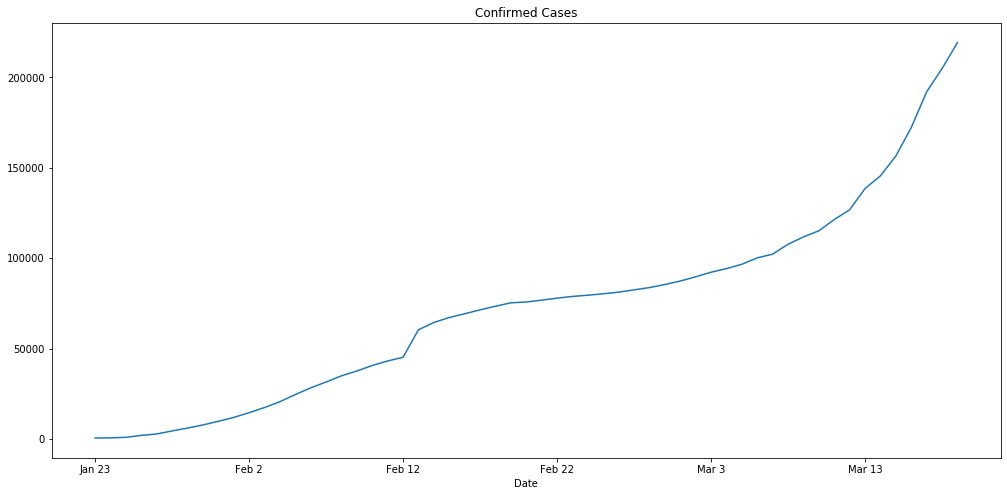

In [7]:
df.TotalConfirmedCases.plot(title="Confirmed Cases", figsize=(17, 8))

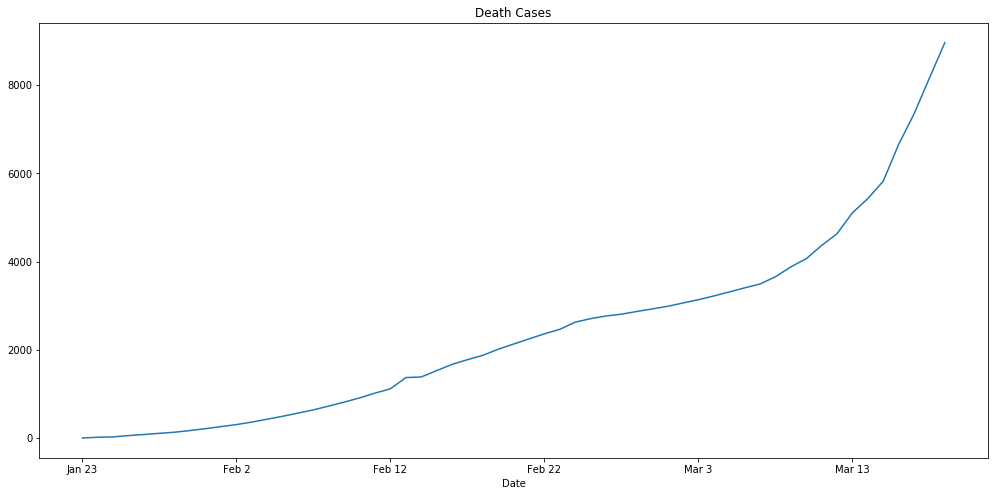

In [8]:
df.TotalDeaths.plot(title="Death Cases", figsize=(17, 8))

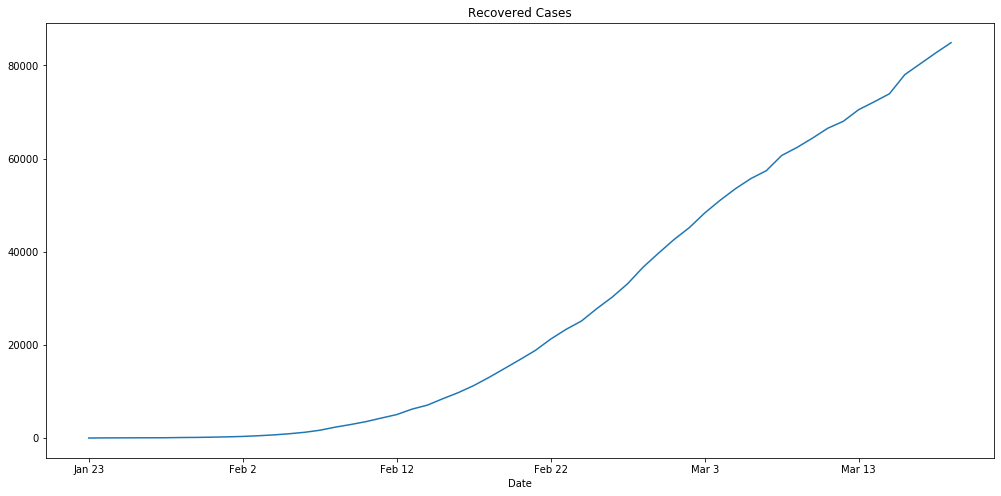

In [9]:
df.TotalRecovered.plot(title="Recovered Cases", figsize=(17, 8))

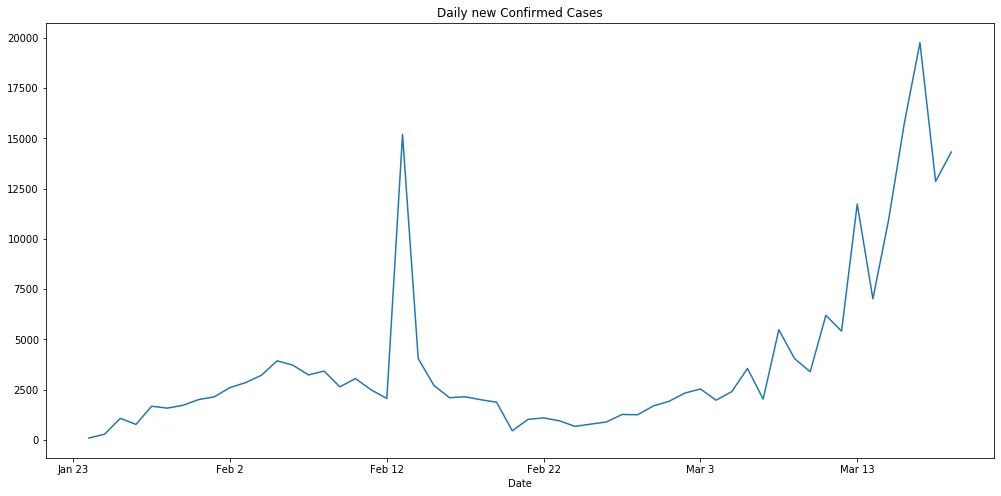

In [10]:
(df.TotalConfirmedCases - df.TotalConfirmedCases.shift(1)).plot(title="Daily new Confirmed Cases", figsize=(17, 8))

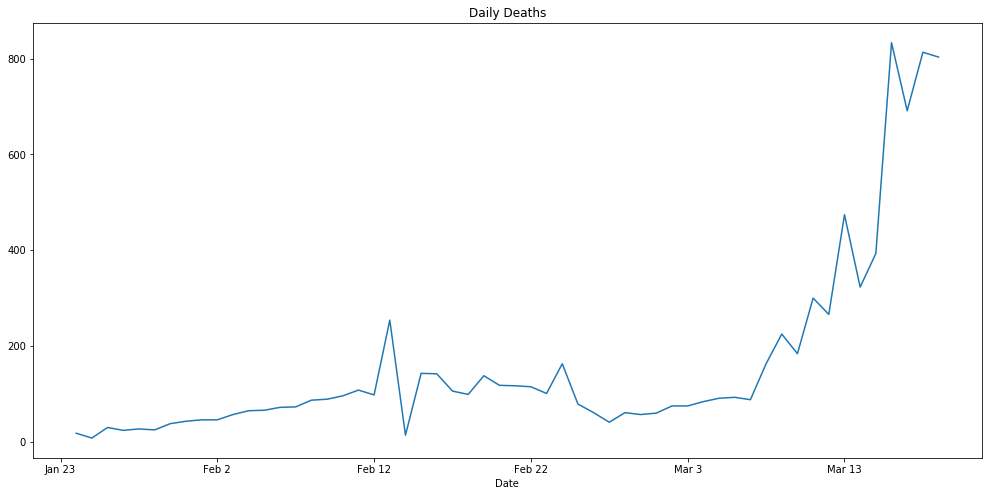

In [11]:
(df.TotalDeaths - df.TotalDeaths.shift(1)).plot(title="Daily Deaths", figsize=(17, 8))

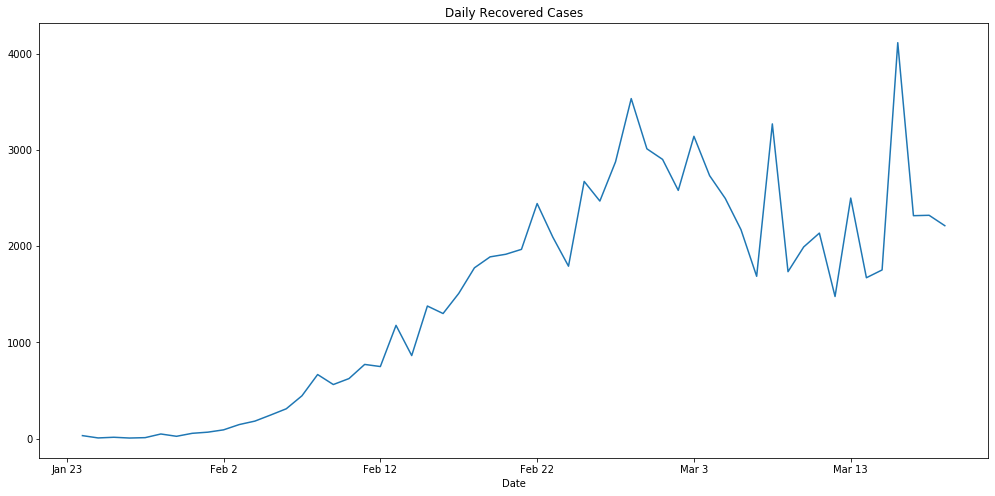

In [12]:
(df.TotalRecovered - df.TotalRecovered.shift(1)).plot(title="Daily Recovered Cases", figsize=(17, 8))

### Constants for predictions

In [13]:
predicted_days = 15
firstPredictionDay = datetime.datetime.strptime(df.index[-1] + ' 2020','%b %d %Y') + datetime.timedelta(days = 1)

### Arima for confirmed cases

In [14]:
confirmed_model = auto_arima(df.TotalConfirmedCases,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=1033.394, BIC=1045.438, Fit time=2.375 seconds
Fit ARIMA: order=(0, 2, 0); AIC=1040.839, BIC=1044.853, Fit time=0.018 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1032.335, BIC=1038.357, Fit time=0.237 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1028.651, BIC=1034.673, Fit time=0.186 seconds
Fit ARIMA: order=(1, 2, 1); AIC=1030.612, BIC=1038.642, Fit time=0.564 seconds
Fit ARIMA: order=(0, 2, 2); AIC=1030.602, BIC=1038.631, Fit time=0.304 seconds
Fit ARIMA: order=(1, 2, 2); AIC=1032.614, BIC=1042.650, Fit time=1.524 seconds
Total fit time: 5.254 seconds


In [15]:
confirmed_model.aic()

1028.650583944461

In [16]:
confirmed_model.fit(df.TotalConfirmedCases)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [17]:
new_cases_forecast = confirmed_model.predict(n_periods=predicted_days)

In [18]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(new_cases_forecast[x])))

2020-03-20 - 234028
2020-03-21 - 249226
2020-03-22 - 264689
2020-03-23 - 280416
2020-03-24 - 296407
2020-03-25 - 312662
2020-03-26 - 329181
2020-03-27 - 345964
2020-03-28 - 363011
2020-03-29 - 380322
2020-03-30 - 397898
2020-03-31 - 415737
2020-04-01 - 433841
2020-04-02 - 452209
2020-04-03 - 470840


### Arima for death cases

In [19]:
deaths_model = auto_arima(df.TotalDeaths,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=641.887, BIC=653.931, Fit time=1.386 seconds
Fit ARIMA: order=(0, 2, 0); AIC=653.153, BIC=657.168, Fit time=0.017 seconds
Fit ARIMA: order=(1, 2, 0); AIC=642.908, BIC=648.930, Fit time=0.265 seconds
Fit ARIMA: order=(0, 2, 1); AIC=644.594, BIC=650.616, Fit time=0.280 seconds
Fit ARIMA: order=(1, 2, 2); AIC=630.638, BIC=640.675, Fit time=1.729 seconds
Fit ARIMA: order=(1, 2, 1); AIC=644.428, BIC=652.457, Fit time=0.466 seconds
Fit ARIMA: order=(1, 2, 3); AIC=641.243, BIC=653.287, Fit time=1.069 seconds
Fit ARIMA: order=(2, 2, 3); AIC=633.804, BIC=647.855, Fit time=2.499 seconds
Fit ARIMA: order=(0, 2, 2); AIC=640.609, BIC=648.639, Fit time=0.452 seconds
Total fit time: 8.223 seconds


In [20]:
deaths_model.aic()

630.6381350544489

In [21]:
deaths_model.fit(df.TotalDeaths)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [22]:
death_forecast = deaths_model.predict(n_periods=predicted_days)

In [23]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(death_forecast[x])))

2020-03-20 - 9916
2020-03-21 - 10987
2020-03-22 - 12169
2020-03-23 - 13461
2020-03-24 - 14861
2020-03-25 - 16368
2020-03-26 - 17981
2020-03-27 - 19697
2020-03-28 - 21516
2020-03-29 - 23436
2020-03-30 - 25456
2020-03-31 - 27574
2020-04-01 - 29790
2020-04-02 - 32101
2020-04-03 - 34507


### Arima for recovered cases

In [24]:
recovered_model = auto_arima(df.TotalRecovered,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0); AIC=863.726, BIC=867.740, Fit time=0.013 seconds
Fit ARIMA: order=(1, 2, 0); AIC=848.739, BIC=854.761, Fit time=0.260 seconds
Fit ARIMA: order=(0, 2, 1); AIC=842.762, BIC=848.784, Fit time=0.317 seconds
Fit ARIMA: order=(1, 2, 1); AIC=843.362, BIC=851.391, Fit time=0.446 seconds
Fit ARIMA: order=(0, 2, 2); AIC=842.506, BIC=850.536, Fit time=0.411 seconds
Fit ARIMA: order=(1, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 3); AIC=843.425, BIC=853.461, Fit time=0.585 seconds
Total fit time: 2.283 seconds


In [25]:
recovered_model.aic()

842.5063539560903

In [26]:
recovered_model.fit(df.TotalRecovered)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [27]:
recovered_forecast = recovered_model.predict(n_periods=predicted_days)

In [28]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(recovered_forecast[x])))

2020-03-20 - 87470
2020-03-21 - 89971
2020-03-22 - 92516
2020-03-23 - 95106
2020-03-24 - 97740
2020-03-25 - 100418
2020-03-26 - 103140
2020-03-27 - 105906
2020-03-28 - 108716
2020-03-29 - 111571
2020-03-30 - 114470
2020-03-31 - 117413
2020-04-01 - 120400
2020-04-02 - 123431
2020-04-03 - 126506
